This notebook simulates the student converted study again, but this time the we will reject the null hypothesis.

Goal of this notebook is to build understanding of how the p_value and the graphs will change if alternative is true

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
no_records = int(round(294478/2, 0))
no_records

147239

In [3]:
# simulate converted data, but make the conversions for treatment group slightly higher

control = np.random.binomial(1, 0.1178, no_records)
treatment = np.random.binomial(1, 0.12, no_records)

In [4]:
df_control = pd.DataFrame(data=control.flatten(), columns=['converted'])
df_control['group'] = 'control'
df_control.head()

,converted,group
0,1,control
1,0,control
2,0,control
3,0,control
4,0,control


In [5]:
df_treatment = pd.DataFrame(data=treatment.flatten(), columns=['converted'])
df_treatment['group'] = 'treatment'
df_treatment.head()

,converted,group
0,0,treatment
1,0,treatment
2,0,treatment
3,0,treatment
4,1,treatment


In [6]:
df2 = pd.concat([df_control, df_treatment])

In [7]:
# overall conversion rate
p_population = df2.converted.mean()
print('Overall "converted" success rate in the populationp_population is {}'.format(round(p_population,4)))

Overall "converted" success rate in the populationp_population is 0.12


In [8]:
p_control = df2.query('group == "control"')['converted'].mean()
print('Probability control group converted is {}'.format(round(p_control, 4)))

Probability control group converted is 0.1181


In [9]:
p_treatment = df2.query('group == "treatment"')['converted'].mean()
print('Probability treatment group converted is {}'.format(round(p_treatment, 4)))

Probability treatment group converted is 0.1219


In [10]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = p_treatment - p_control
print('Actual difference between the conversion rates for the two groups is {}'.format(round(obs_diff,4)))

Actual difference between the conversion rates for the two groups is 0.0038


In [11]:
# What is the probability that an individual received the new page?
round(df2.group.value_counts(normalize=True), 4)

control      0.5
treatment    0.5
Name: group, dtype: float64

In [12]:
n_new = len(df2.query('group == "treatment"'))
print('Number of individuals in the treatment group is {}'.format(n_new))

Number of individuals in the treatment group is 147239


In [13]:
n_old = len(df2.query('group == "control"'))
print('Number of individuals in the control group is {}'.format(n_old))

Number of individuals in the control group is 147239


In [14]:
# Simulate a Sample for the treatment Group
df_treatment = df2.query('group == "treatment"')
new_page_converted = np.random.choice(df_treatment['converted'], size=n_new)
p_new_mean = new_page_converted.mean()
p_new_mean

0.12164575961531932

In [15]:
# Simulate a Sample for the control Group
df_control = df2.query('group == "control"')
old_page_converted = np.random.choice(df_control['converted'], size=n_old)
p_old_mean = old_page_converted.mean()
p_old_mean

0.1177745026793173

In [16]:
sample_diff = p_new_mean - p_old_mean
sample_diff

0.0038712569360020155

In [17]:
# Sampling distribution 
p_diffs = []

for _ in range(10000):    
    new_page_mean = np.random.choice(new_page_converted, size=n_new).mean()
    old_page_mean = np.random.choice(old_page_converted, size=n_old).mean()    
    p_diffs.append(new_page_mean - old_page_mean)

In [18]:
# convert to numpy array and calculate the mean
p_diffs = np.array(p_diffs)
round(p_diffs.mean(),4)

0.0039

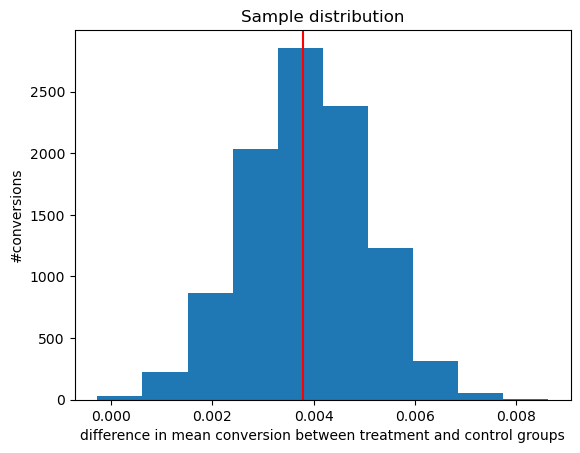

In [19]:
plt.hist(p_diffs)
plt.axvline(obs_diff, color='r')
plt.xlabel('difference in mean conversion between treatment and control groups')
plt.ylabel('#conversions')
plt.title('Sample distribution')
plt.show()

In [20]:
p_diffs.std()

0.001204428112358958

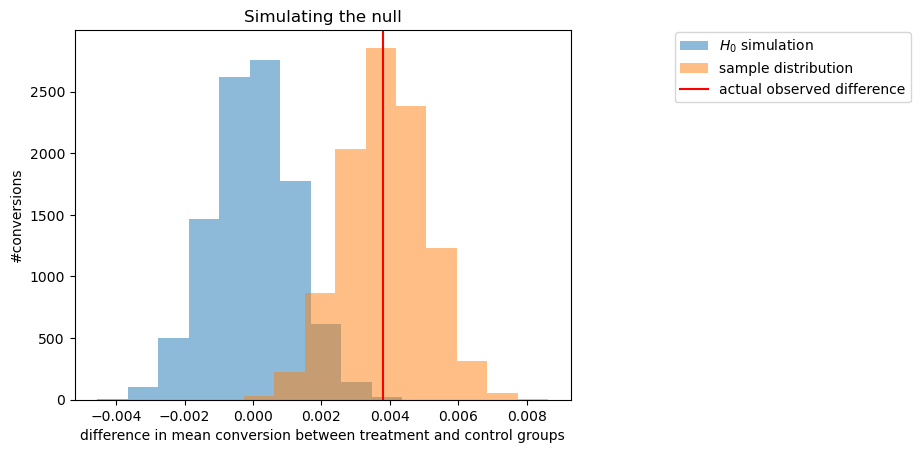

In [21]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals, alpha=0.5, label='$H_0$ simulation')
plt.hist(p_diffs, alpha=0.5, label='sample distribution')
plt.axvline(x=obs_diff,color='red', label='actual observed difference')
plt.xlabel('difference in mean conversion between treatment and control groups')
plt.ylabel('#conversions')
plt.title('Simulating the null')
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.9))
plt.show()

In [22]:
# Compute p-value
(null_vals > obs_diff).mean()

0.0008

In [ ]:
# convert notebook to html
import os

os.system('jupyter nbconvert --to html simulate_alternative.ipynb')